First 5 rows of the dataset:
      Sex  Age  Diabetes duration (y)  Diabetic retinopathy (DR)  \
0    Male   57                   10.0                          1   
1    Male   50                    8.0                          1   
2    Male   53                    8.0                          1   
3    Male   52                   20.0                          1   
4  Female   56                   12.0                          1   

   Diabetic nephropathy (DN)  Smoking  Drinking  Height(cm)  Weight(kg)  \
0                          1        1         0       178.0        60.0   
1                          1        1         1       172.0        72.5   
2                          0        1         0       168.0        62.0   
3                          1        0         0       175.0        66.0   
4                          1        0         0       159.0        68.8   

   BMI (kg/m2)  ...  HbA1c (%)  FBG (mmol/L)  TG（mmoll）  C-peptide (ng/ml）  \
0    18.937003  ...       14.1   

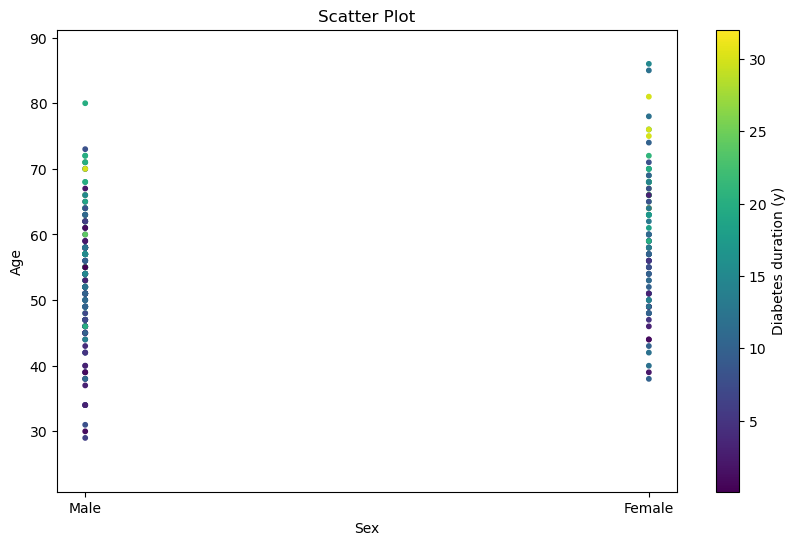

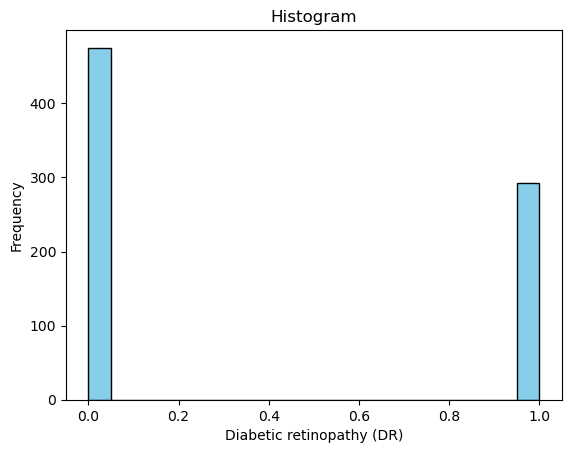

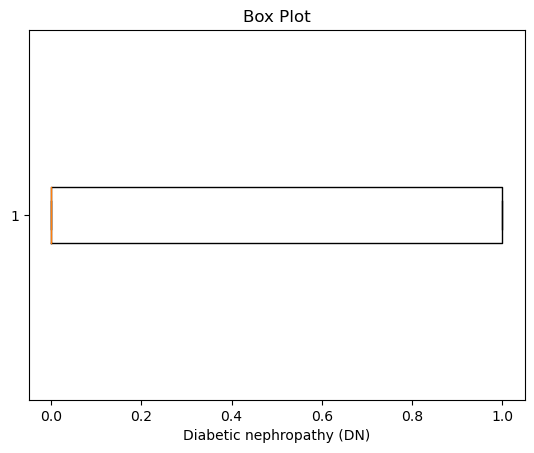

C:\Users\way2k\AppData\Local\Temp\ipykernel_9220\4158031648.py:56: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()



Correlation Matrix:
                                Age  Diabetes duration (y)  \
Age                        1.000000               0.401060   
Diabetes duration (y)      0.401060               1.000000   
Diabetic retinopathy (DR) -0.031814               0.218371   
Diabetic nephropathy (DN)  0.041852               0.174754   
Smoking                   -0.094444              -0.055035   
Drinking                  -0.082860              -0.049529   
Height(cm)                -0.340180              -0.126454   
Weight(kg)                -0.317767              -0.134370   
BMI (kg/m2)               -0.118891              -0.076093   
SBP (mmHg)                 0.132136               0.109141   
DBP (mmHg)                -0.039110              -0.049799   
HbA1c (%)                 -0.038003              -0.145708   
FBG (mmol/L)              -0.104730              -0.081428   
TG（mmoll）                 -0.196963              -0.140939   
C-peptide (ng/ml）         -0.077954              

KeyError: 'Value'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset from the Excel file
excel_file = 'Diabetic_Nephropathy_v1.xlsx'
df = pd.read_excel(excel_file, engine='openpyxl')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Basic summary statistics
print("\nBasic Summary Statistics:")
print(df.describe())

# Selecting specific columns
selected_columns = df[['Sex', 'Age']]

# Filtering data
filtered_data = df[df['Diabetes duration (y)'] > 50]

# Sorting data
sorted_data = df.sort_values(by='Diabetic retinopathy (DR)', ascending=False)

# Grouping and aggregation
grouped_data = df.groupby('Sex')['Diabetic nephropathy (DN)'].mean()

# Handling missing data
df.dropna()  # Drop rows with missing values
# df.fillna(value)  # Fill missing values with a specific value

# Data visualization using Matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df['Sex'], df['Age'], c=df['Diabetes duration (y)'], cmap='viridis', s=df['Diabetic retinopathy (DR)']*10)
plt.title('Scatter Plot')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.colorbar(label='Diabetes duration (y)')
plt.show()

# Histogram
plt.hist(df['Diabetic retinopathy (DR)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Diabetic retinopathy (DR)')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.boxplot(df['Diabetic nephropathy (DN)'], vert=False)
plt.title('Box Plot')
plt.xlabel('Diabetic nephropathy (DN)')
plt.show()

# Correlation analysis
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Pivot tables
pivot_table = pd.pivot_table(df, values='Value', index='Category', columns='Time', aggfunc=np.mean)

# Saving the modified DataFrame to a new Excel file
df.to_excel('modified_dataset.xlsx', index=False, engine='openpyxl')

# Saving plots to files
plt.savefig('scatter_plot.png')
plt.savefig('histogram.png')
plt.savefig('box_plot.png')

# Displaying plots in a Jupyter Notebook
# %matplotlib inline

# Exporting data to other formats
df.to_csv('data.csv', index=False)
df.to_json('data.json')

# These are some of the basic methods and techniques used in real-world data analysis with pandas, numpy, and matplotlib. You can adapt and extend this code to suit your specific dataset and analysis requirements.
